In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets_IBM_clean_ready.csv')

In [4]:
df_final = df[['TotalWorkingYears',
         'MonthlyIncome',
         'Age',
         'YearsAtCompany',
         'DailyRate',
         'MonthlyRate',
         'EmployeeNumber',
         'NumCompaniesWorked',
         'DistanceFromHome',
        'Attrition'
         
         ]]
df_final.shape

(1470, 10)

In [6]:
x = df_final.drop(columns='Attrition')
y = df_final['Attrition']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [7]:
#applying model Logistic Regression with hyperparameter
logre_top = LogisticRegression(solver = 'saga', penalty = 'none', max_iter = 10, class_weight = 'balanced').fit(x_train, y_train)

In [8]:
#Logistic Regression
logre_pred_top = logre_top.predict(x_test)

In [9]:
#confusion matrix
conmat_logre_top = confusion_matrix(y_test, logre_pred_top)
conmat_logre_top

array([[140, 110],
       [ 16,  28]], dtype=int64)

In [11]:
labels = ['No', 'Yes']

              precision    recall  f1-score   support

          No       0.90      0.56      0.69       250
         Yes       0.20      0.64      0.31        44

    accuracy                           0.57       294
   macro avg       0.55      0.60      0.50       294
weighted avg       0.79      0.57      0.63       294



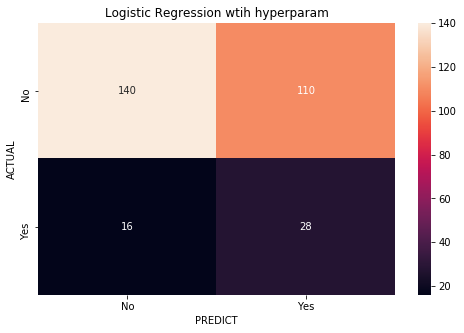

In [12]:
print(classification_report(y_test, logre_pred_top, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conmat_logre_top, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression with hyperparam')
plt.xlabel("PREDICT")
plt.ylabel("ACTUAL")
plt.show()

In [13]:
print(logre_top.score(x_train,y_train))

0.6147959183673469


In [14]:
print(logre_top.score(x_test,y_test))

0.5714285714285714


In [18]:
robust = RobustScaler()

In [20]:
joblib.dump(logre_top, 'final_model')
joblib.dump(robust, 'final_scaler')

['final_scaler']